In [1]:
#%pip install ipywidgets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
def plot_rainfall_distribution(rainfall_data, label, ax):
    """Plots a rainfall distribution and optionally adds an actual value."""
    
    counts, bins, patches = ax.hist(rainfall_data, bins=20, alpha=0.7,label=label)

    ax.set_xlabel('Rainfall')
    ax.set_ylabel('Frequency')
    ax.set_yscale('log')  # Set y-axis to log scale
    ax.set_ylim(ymin=0.5) # Set y-axis minimum to 0.5
    ax.legend()

    return ax

# Forecasting game.

We will start by showing the climatology of the location "HYDRO-LAND"...

In [4]:
# Gamma Distribution Parameters
alpha = 0.7  # Shape parameter
beta = 30   # Scale parameter

<Axes: xlabel='Rainfall', ylabel='Frequency'>

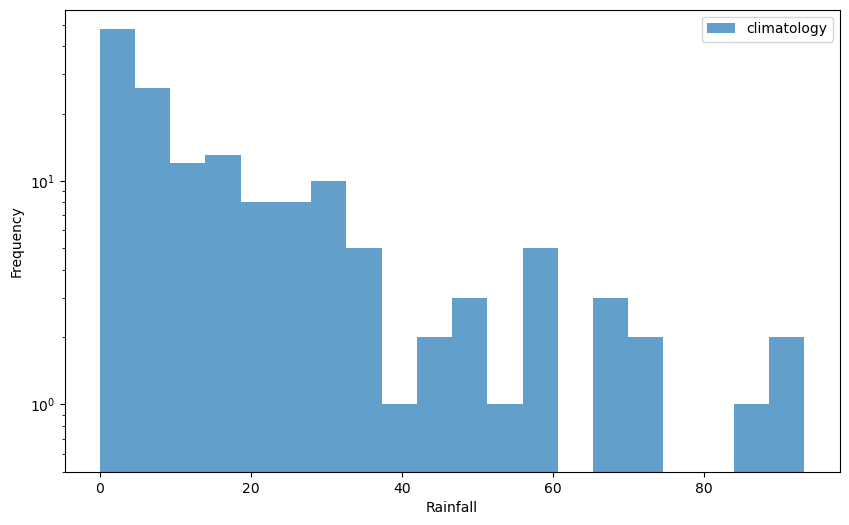

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Generate Forecast Ensemble (Gamma Distribution)
climate_size = 150
climate = np.random.gamma(alpha, beta, climate_size)
plot_rainfall_distribution(climate, 'climatology', ax )


In [6]:
import numpy as np

def generate_lognormal_samples(mean, std_dev, num_samples):
    """
    Generates random numbers distributed according to a lognormal function.

    Args:
        mean: The desired mean of the lognormal distribution.
        std_dev: The desired standard deviation of the lognormal distribution.
        num_samples: The number of random samples to generate.

    Returns:
        A NumPy array of random numbers following the lognormal distribution.
    """

    # Calculate the parameters for the underlying normal distribution
    mu = np.log(mean**2 / np.sqrt(mean**2 + std_dev**2))
    sigma = np.sqrt(np.log(1 + (std_dev**2 / mean**2)))

    # Generate random numbers from the lognormal distribution
    samples = np.random.lognormal(mu, sigma, num_samples)

    return samples

In [7]:
# model bias
bias_mean=0 
bias_sd=2
model_bias = np.random.normal(bias_mean, bias_sd, 1)

uncertainty_mean=10
uncertainty_sd=5

[10.84343426] [10.84343426]
Stored 'ax' (Axes)


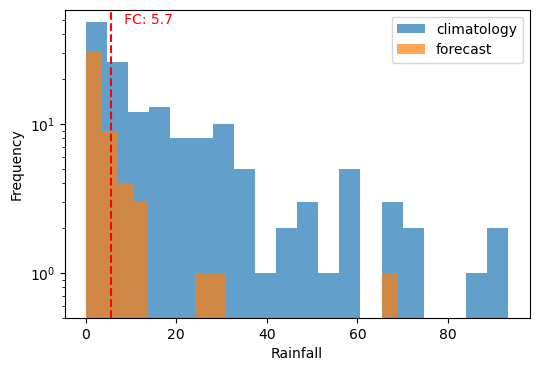

In [8]:

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# plot climate
ax=plot_rainfall_distribution(climate, 'climatology', ax )

# guide rainfall amount:
rain_seed = np.random.gamma(alpha,beta,1)

# initial condition uncertainty:
uncertainty = generate_lognormal_samples(uncertainty_mean,uncertainty_sd,1)
print(uncertainty,uncertainty)

# now generate forecast ensemble
ensemble_size=50
forecast_ens = generate_lognormal_samples(rain_seed+model_bias,uncertainty,ensemble_size)
ax=plot_rainfall_distribution(forecast_ens, 'forecast', ax )

#

# add a line for the vertical mean
forecast_mean=np.mean(forecast_ens)
ax.axvline(forecast_mean, color='red', linestyle='--', label='Actual')
ax.text(forecast_mean, ax.get_ylim()[1] * 0.8, f"   FC: {forecast_mean:.1f}", color='red', ha='left')

%store ax

4.148474320967448


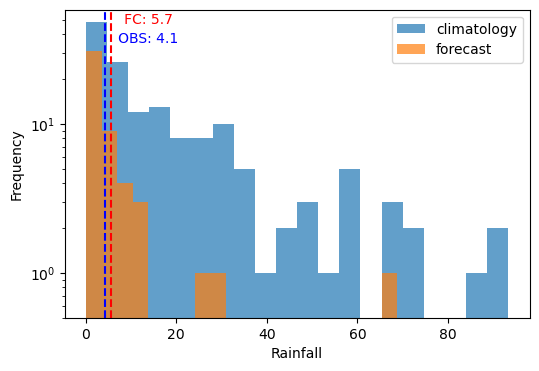

In [9]:
%store -r ax

# let's see what actually happened 
rainfall=np.random.choice(forecast_ens, size=1, replace=False)+model_bias
rainfall=rainfall[0]
if rainfall<0:
    rainfall=0
print(rainfall)

ax.axvline(rainfall, color='blue', linestyle='--', label='Actual')
ax.text(rainfall, ax.get_ylim()[1] * 0.6, f"   OBS: {rainfall:.1f}", color='blue', ha='left')

plt.show()